<a href="https://colab.research.google.com/github/CBravoR/AdvancedAnalyticsLabs/blob/master/Lab_2_Revenue_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Revenue Management

In this lab, we will study implementations of the algorithms we have discussed in the Revenue Management lectures. Since we will be using a lot of numerical methods, we would need to program a large set of statistical distributions, mathematical functions, and other mathematical quantities. Luckily for us, this has already been done.

A **package** is a set of functions, constants, and other data that comes pre-packaged and can be used once installed locally. Many packages are available (exactly [168,180](https://pypi.python.org/pypi)), but we will focus only on a set of them of course.

The fist one is [Numpy](http://www.numpy.org/), self-described as "the fundamental package for scientific computing with Python". It comes with a very large number of scientific functions. These range from simply implementing mathetical constants (such as $\pi$ or $e$), to mathematical functions (such as the logistic functions), random number generators, and much, much, more. As we move along with the activities of the module, we will use many of Numpy's functions, but the packages that we will use will most certainly be using Numpy under the hood.

## Loading packages

To load a package so it can be used in your terminal, write the following line:

```
import PACKAGE as SHORT_NAME
```

For example, to load Numpy and assign it the (well-known) alias "np" we run

In [0]:
import numpy as np

With this, all of numpy is available by calling ```np.NAME```. For example, to check the value of $\pi$.

In [0]:

np.pi

3.141592653589793

... or to calculate the value of $e^4$.

In [0]:
np.e ** 4

54.59815003314423

Note that the power function is two asterisks, so for example $4^2$ would require this line of code:

In [0]:
4 ** 2

16

Numpy is a **very** extensive package. You can explore the details of it [here](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html). We will now apply it in order to calculate the functions we need.

We first start by studying elasticity.

## Constant elasticity functions

This means the demand function is $𝑑(𝑝)=𝐶𝑝^{−𝜖}$. What is the shape of this function?

### Calculating the demand function.

We will first create a function using Python. As you studied last week (right????), a function is defined following this convention:

```
def NAME(PARAMS):
    FUNCTION CODE
    MORE CODE
```

So, let's define the function "d_const_elast" which will receive the price, the elasticity, and an optional constant with the number of cases that we have.

In [0]:
def d_const_elast(p, elast, C = 100):
    out = C * p ** (-1 * elast)
    return(out)

Now our function is ready to use! See how we give a value to ```C```? This is an **optional variable**. By saying ```C = 100```, we are allowing the function to receive two or three parameters.

1. Calling ```d_const_elast(10, 1)``` will calculate the value of the demand using ```p = 10, elast = 1, C = 100```.
2. Calling ```d_const_elast(10, 1, 400)``` will calculate the value of the demand using ```C = 400```.
3. Calling ```d_const_elast(10)``` will fail.
4. Calling ```d_const_elast(elast = 1, p = 10, C = 400)``` (or any other order) also works as long as all the inputs are named!

In [0]:
d_const_elast(10, 1, 400)

40.0

In [0]:
d_const_elast(elast = 1, p = 10, C = 400)

40.0

In [0]:
d_const_elast(C = 400, elast = 1, p = 10)

40.0

In [0]:
d_const_elast(C = 400, elast = 1)

TypeError: ignored

The last commands fails because the argument p is **not** an optional argument.

### Plotting the function

We can now plot the function. We will do so using the extremely powerful package ```matplotlib```, in particular the python implementation ```pyplot```.  We will use the common alias ```plt```.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

The line ```%matplotlib inline``` is called a "magic", and is a command that tells Jupyter to do something specific. This commands tells Jupyter to plot inline (i.e. in this notebook directly), instead of saving the image elsewhere. A list of all magic commands is available [here](http://ipython.readthedocs.io/en/stable/interactive/magics.html).

We can now plot a function with a constant elasticity over the range [1, 100] with the following functions:

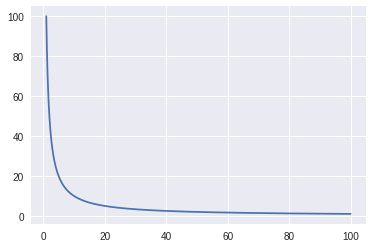

In [0]:
p = np.arange(1, 100.1, 0.1) # Calculates evenly spaced points in the interval 1 to 100.

plt.plot(p, d_const_elast(p, 1)) # Applies the vector p to the d_const_elast function using elast = 1
plt.show()

We can even compare multiple functions. For example, the following code compares multiple elasticities.

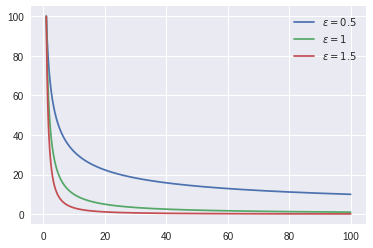

In [0]:
plt.plot(p, d_const_elast(p, 0.5))
plt.plot(p, d_const_elast(p, 1))
plt.plot(p, d_const_elast(p, 1.5))

plt.legend(['$\epsilon = 0.5$', '$\epsilon = 1$', '$\epsilon = 1.5$'])

plt.show()

## Littlewood's rule and protection levels.

We will now calculate the Littlewood rule for a continuous function. The idea is to calculate the limit $y_1$ such that:

$$
p_2 = p_1 P(D_1 \ge y_1)
$$

Let's assume the following:

- $p_1 = 300$
- $p_2 = 100$
- The first class demand distributes as a [gamma](http://www.itl.nist.gov/div898/handbook/eda/section3/eda366b.htm) distribution of parameter 5.
- The plane has 1,000 seats (i.e. the scale of the distribution is 50).

For this, we will use the "sister" package of Numpy, Scipy. Scipy comes with the useful "stats" subpackage, with includes a large number of statistical distributions. To use one, we will first import the package, create our distribution, and then plot the CDF and PDF.

In [0]:
import scipy.stats as stats

In [0]:
fp = stats.gamma(a = 5, scale = 50) # Creates the distribution with the parameters we got.

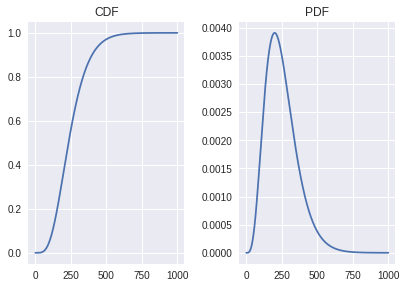

In [0]:
# Sequence over which to plot.
t = np.arange(0, 1000, 0.01)

# Create an overall figure
plt.figure(1)

# CDF plot
plt.subplot(121)
plt.plot(t, fp.cdf(t))
plt.title('CDF')

# PDF plot
plt.subplot(122)
plt.plot(t, fp.pdf(t))
plt.title('PDF')

# Minor adjustments to size and shape
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


plt.show()

Now we can solve the equation. For this, we need to calculate the point where the CDF is equal to the proportion of prices. We can use the function ```fsolve``` from the subpackage ```scipy.optimize```. We don't need the whole package, just one function, so we can import it as follows:

In [0]:
from scipy.optimize import fsolve

Now the function is available without calling any other package before it (so no ```x.fsolve```).

The function ```fsolve``` finds the solution to equations of the form $f(x)=0$. It takes as mandatory arguments the function, and a first guess (which must be sufficiently close to the real solution!).

Let's program the function to optimize.

In [0]:
def flittle(y, p1 = 300, p2 = 100):
    out = 1- fp.cdf(y) - p2/p1
    return(out)

In [0]:
flittle(100)

0.6140136493229555

In [0]:
fsolve(flittle, 100)

array([282.93393485])

This is telling us that the optimal reservation quantity is 282 seats, i.e., we should only sell $1000 - 282 = 718$ seats to class 2.

## EMSR-b

Finally, we will estimate EMSR-b for continuous distributions. The pooling of the demand makes this a bit more of a complicated measure, but this can easily be solved with a good estimation of the demand.

For example, if we assume that the demands are normal, such that each demand has a mean $\mu_j$ and a variance $\sigma^2_j$, then the remaining demand will simply be the sum of the remaining elements, i.e.

$$
\mu_j = \sum_{i=1}^j \mu_i
$$

and

$$
\sigma^2_j = \sum_{i=1}^j \sigma^2_i
$$

As an example, let us consider three classes such that:

- Class one has $p_1 = 500, \mu_1 = 50, \sigma^2_1 = 100$.
- Class two has $p_2 = 250, \mu_1 = 300, \sigma^2_2 = 1000$.
- Class three has $p_3 = 100, \mu_1 = 1000, \sigma^2_2 = 5000$.

This means that setting the price from class three requires pooling demand and applying Littlewood's rule. We start by defining this problem using vectors.

In [0]:
p = [500, 250, 100]
mu = [50, 300, 1000]
sigmasq = [100, 1000, 5000]

We can now calculate first the weighted average price observed by class three. The argument "weights" of ```np.average``` allows to quickly calculate weighted averages.

In [0]:
pavg = np.average(p[1:2], weights=mu[1:2])
pavg

250.0

And the parameters for the normal distribution will be:

In [0]:
muavg = np.sum(mu[0:2])
ssqavg = np.sum(sigmasq[0:2])
print('mu = ', muavg)
print('sigmasq = ', ssqavg)

mu =  350
sigmasq =  1100


We can now apply Littlewood's rule iteratively using the normal function as a base. Starting from the first class to the second.

In [0]:
normal = stats.norm(loc = mu[0], scale = np.sqrt(sigmasq[0]))
def flittle(y, p1 = p[0], p2 = p[1]):
    out = 1 - normal.cdf(y) - p2/p1
    return(out)

fsolve(flittle, 70)

array([50.])

This means, 50 seats should be saved for class 1. 

We can now calculate the prices for the aggregated class to class three.

In [0]:
normal = stats.norm(loc = muavg, scale = np.sqrt(ssqavg))
def flittle(y, p1 = pavg, p2 = p[2]):
    out = 1 - normal.cdf(y) - p2/p1
    return(out)

fsolve(flittle, 300)

array([358.40257283])

So 358 seats should be saved for the remaining classes. That means that $358 - 50 = 308$ are saved for class 2. The remaining $1000 - 358 = 642$ can be freely sold to class three.

**Note: An earlier version of this notebook incorrectly showed 692 seats for class 3. This has been corrected (thanks Hana!)**

## Self-study

Implement EMSR-a for the example above, and compare the results. Which one gives better results? Does that satisfy what you expected.

Now you are ready to answer question 2 of the first coursework!